In [3]:
import numpy as np
import pandas as pd 
import random
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy.linalg import inv

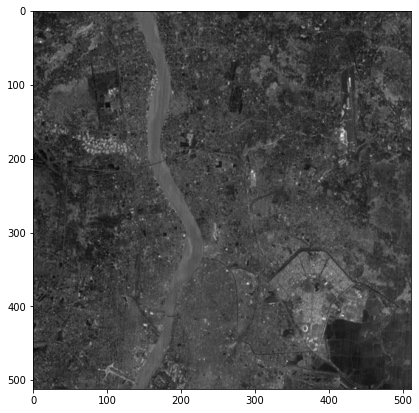

band1.gif


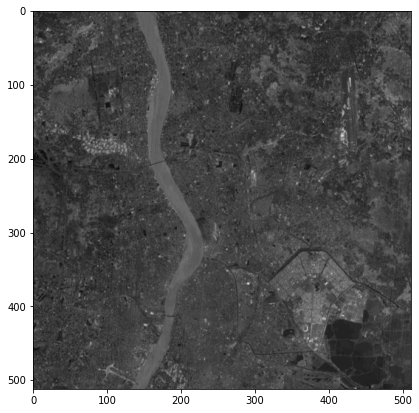

band2.gif


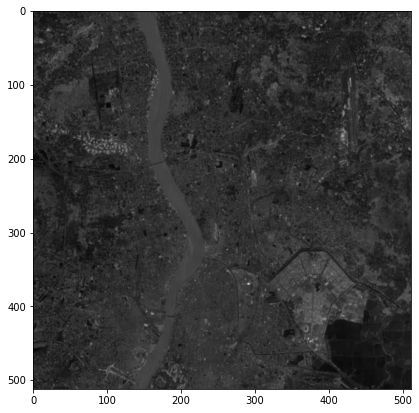

band3.gif


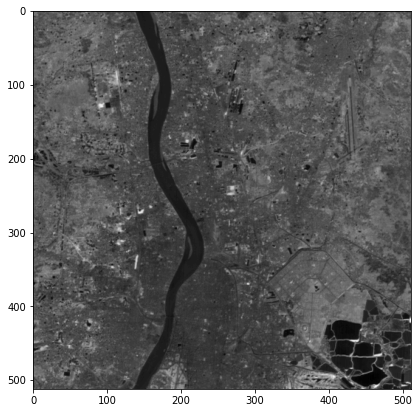

band4.gif


In [4]:
#Taking the  different band images as Input 

image_array = np.ndarray(shape = (512,512,4))

for i in range(4):
    img = plt.imread('band'+ str(i+1)+'.gif')
    image_array[:,:,i] = np.array(img[:,:,0])
    plt.imshow(image_array[:,:,i],cmap='gray')
    plt.subplots_adjust(right=1, top=2)
    plt.show()
    print('band'+ str(i+1)+'.gif')


In [5]:
#Taking Ramdom Samples of River and Non River datapoints
river_sample = pd.read_csv('annotated_points_band4_np_50.csv')
non_river_sample = pd.read_csv('annotated_points_band4_np_150.csv')

river_col = np.array(river_sample['column'])
river_row = np.array(river_sample['row'])

non_river_col = np.array(non_river_sample['column'])
non_river_row = np.array(non_river_sample['row'])

In [6]:
river_mean=np.zeros(4,dtype=np.float64)
a = np.zeros((50,4),dtype=np.int32)

for i in range(4):
    for j in range(50):
        a[j,i]=image_array[river_row[j],river_col[j],i]
    
river_mean=np.mean(a,axis=0)
print(river_mean)

[43.82 30.   31.32 21.  ]


In [7]:
non_river_mean=np.zeros(4,dtype=np.float64)
b = np.zeros((150,4),dtype=np.int32)
for i in range(4):
    for j in range(150):
        b[j,i]=image_array[non_river_row[j],non_river_col[j],i]
    
non_river_mean=np.mean(b,axis=0)
print(non_river_mean)

[40.6        25.62       26.61333333 34.58666667]


In [8]:
#Finding Variance-Covariance Matrix
river_cov=np.cov(a,rowvar=False)
non_river_cov=np.cov(b,rowvar=False)
print("Covariance Matrix for River points:\n",river_cov)
print("\nCovariance Matrix for Non_River points:\n",non_river_cov)
inverse_river_cov = inv(river_cov)
inverse_non_river_cov = inv(non_river_cov)

Covariance Matrix for River points:
 [[ 0.72204082  0.32653061  0.22204082 -0.24489796]
 [ 0.32653061  0.36734694  0.20408163 -0.26530612]
 [ 0.22204082  0.20408163  0.3444898  -0.12244898]
 [-0.24489796 -0.26530612 -0.12244898  0.44897959]]

Covariance Matrix for Non_River points:
 [[ 7.51677852  6.06845638  9.11946309  1.12214765]
 [ 6.06845638  5.78080537  8.20107383  3.74120805]
 [ 9.11946309  8.20107383 14.27901566  1.93306488]
 [ 1.12214765  3.74120805  1.93306488 34.53941834]]


In [9]:
#Density functions
def pdf(i,j):
    
    r = np.subtract(image_array[i,j,:], river_mean)
    nr = np.subtract(image_array[i,j,:], non_river_mean)

    det_cov_r = np.linalg.det(river_cov)
    p1 = (1/(2*np.pi))**(4/2) * (1/np.sqrt(det_cov_r)) * np.exp((-0.5)*np.matmul(np.matmul(r.T, inverse_river_cov), r))

    det_cov_nr = np.linalg.det(non_river_cov)
    p2 = (1/(2*np.pi))**(4/2) * (1/np.sqrt(det_cov_nr)) * np.exp((-0.5)*np.matmul(np.matmul(nr.T, inverse_non_river_cov), nr))
    
    return p1, p2

In [10]:
# Assigning River or Non River class to the image points
classified_image=np.ndarray(shape=(512, 512))

for i in range(512):
    for j in range(512):
        p1, p2 = pdf(i,j)
        if((0.25 * p1) >= (0.75 * p2)):
            classified_image[i,j] = 0
        else:
            classified_image[i,j] = 1

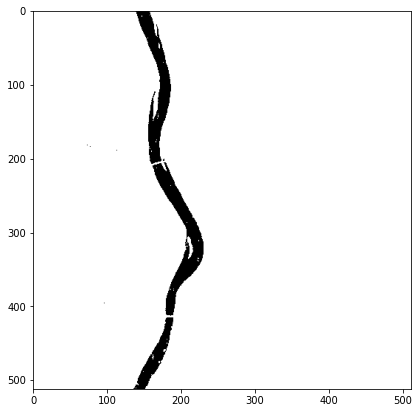

In [11]:
#Black is River Region and White is non-River Region
plt.imshow(classified_image,cmap="gray")
plt.subplots_adjust(right=1, top=2)
plt.show()

In [12]:
#Taking intensity values between 0 and 1 for stability
m=np.max(image_array)
river_cov=np.cov(a,rowvar=False)/(m**2)
non_river_cov=np.cov(b,rowvar=False)/(m**2)
print("Covariance Matrix for River points:\n",river_cov)
print("\nCovariance Matrix for Non_River points:\n",non_river_cov)
inverse_river_cov = inv(river_cov)
inverse_non_river_cov = inv(non_river_cov)

Covariance Matrix for River points:
 [[ 1.12818878e-04  5.10204082e-05  3.46938776e-05 -3.82653061e-05]
 [ 5.10204082e-05  5.73979592e-05  3.18877551e-05 -4.14540816e-05]
 [ 3.46938776e-05  3.18877551e-05  5.38265306e-05 -1.91326531e-05]
 [-3.82653061e-05 -4.14540816e-05 -1.91326531e-05  7.01530612e-05]]

Covariance Matrix for Non_River points:
 [[0.0011745  0.0009482  0.00142492 0.00017534]
 [0.0009482  0.00090325 0.00128142 0.00058456]
 [0.00142492 0.00128142 0.0022311  0.00030204]
 [0.00017534 0.00058456 0.00030204 0.00539678]]


In [13]:
def pdf(i,j):
    
    r = np.subtract(image_array[i,j,:]/m, river_mean/m)
    nr = np.subtract(image_array[i,j,:]/m, non_river_mean/m)

    det_cov_r = np.linalg.det(river_cov)
    p1 = (1/(2*np.pi))**(4/2) * (1/np.sqrt(det_cov_r)) * np.exp((-0.5)*np.matmul(np.matmul(r.T, inverse_river_cov), r))

    det_cov_nr = np.linalg.det(non_river_cov)
    p2 = (1/(2*np.pi))**(4/2) * (1/np.sqrt(det_cov_nr)) * np.exp((-0.5)*np.matmul(np.matmul(nr.T, inverse_non_river_cov), nr))
    
    return p1, p2


# Assigning River or Non River class to the image points
classified_image_std=np.ndarray(shape=(512, 512))

for i in range(512):
    for j in range(512):
        p1, p2 = pdf(i,j)
        if((0.25 * p1) >= (0.75 * p2)):
            classified_image_std[i,j] = 0
        else:
            classified_image_std[i,j] = 1

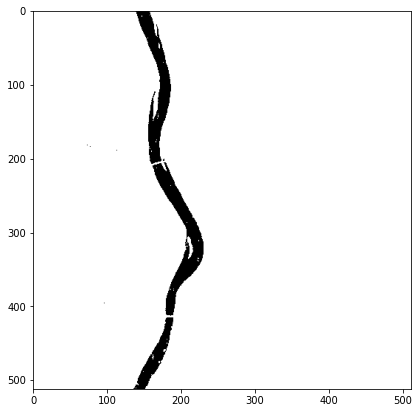

In [14]:
#Black is River Region and White is non-River Region
plt.imshow(classified_image_std,cmap="gray")
plt.subplots_adjust(right=1, top=2)
plt.show()

In [15]:
#Checking difference between two images
print(np.mean(classified_image==classified_image_std))#They are exactly the same

1.0
